# Tidy Tuesday: British Library Funding
**July 15, 2025**

Todays' goal is to remake the plots and grpahs as seen in this
[article](https://blog.dshr.org/2017/08/preservation-is-not-technical-problem.html) and [spreadsheet](https://docs.google.com/spreadsheets/d/1uxjiuWYZrALF2mthmiYbUPieu1dEdEwv9GB8dEAizso/edit?gid=0#gid=0).

In [88]:
# Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [89]:
# Import the csv
data = pd.read_csv('bl_funding.csv')

In [90]:
data.head()

,year,nominal_gbp_millions,gia_gbp_millions,voluntary_gbp_millions,investment_gbp_millions,services_gbp_millions,other_gbp_millions,year_2000_gbp_millions,inflation_adjustment,total_y2000_gbp_millions,percentage_of_y2000_income,gia_y2000_gbp_millions,voluntary_y2000_gbp_millions,investment_y2000_gbp_millions,services_y2000_gbp_millions,other_y2000_gbp_millions,gia_as_percent_of_peak_gia
0,2023,151.8,127.800,8.200,3.000,12.800,0.000,NaN,1818796.76,83.461772,0.757366,70.266235,4.508475,1.649442,7.037620,0.000000,0.743019
1,2022,147.6,116.500,14.900,0.800,15.600,0.000,NaN,1674338.62,88.154211,0.799947,69.579713,8.899036,0.477801,9.317112,0.000000,0.735759
2,2021,141.4,110.412,20.086,0.080,9.753,1.042,NaN,1534702.63,92.135113,0.836072,71.943579,13.087877,0.052127,6.354977,0.678959,0.760756
3,2020,125.9,108.226,9.524,0.196,7.584,0.383,NaN,1495983.26,84.158696,0.763691,72.344392,6.366381,0.131018,5.069575,0.256019,0.764994
4,2019,121.1,96.899,8.626,0.426,13.249,1.925,NaN,1483364.96,81.638709,0.740823,65.323776,5.815157,0.287185,8.931720,1.297725,0.690756


Looks like everything is a numerical value. Quickly make sure the values are stored as numericals as well:

In [91]:
data.dtypes

year                               int64
nominal_gbp_millions             float64
gia_gbp_millions                 float64
voluntary_gbp_millions           float64
investment_gbp_millions          float64
services_gbp_millions            float64
other_gbp_millions               float64
year_2000_gbp_millions           float64
inflation_adjustment             float64
total_y2000_gbp_millions         float64
percentage_of_y2000_income       float64
gia_y2000_gbp_millions           float64
voluntary_y2000_gbp_millions     float64
investment_y2000_gbp_millions    float64
services_y2000_gbp_millions      float64
other_y2000_gbp_millions         float64
gia_as_percent_of_peak_gia       float64
dtype: object

Cool. Now onto the visualizations.

## Inlfation-adjusted plot from the article

In [92]:
even_years = []

for year in data.year:
    if year%2 == 0:
        even_years.append(year)

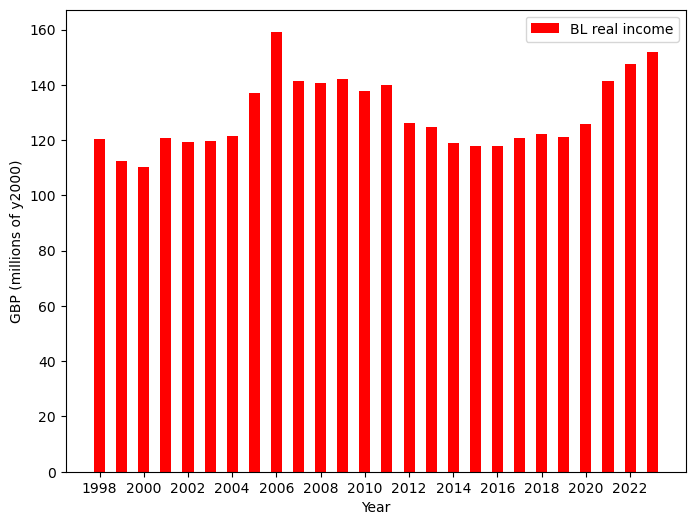

In [93]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(data.year, data.nominal_gbp_millions, color='red', label='BL real income', width=0.5)
ax.set_xticks(ticks=even_years)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('GBP (millions of y2000)')

plt.show()

## Plots from the Google Sheets link ##
### Bottom 3 ###

In [94]:
# Mask the needed variables
plot1 = data[['gia_gbp_millions', 'voluntary_gbp_millions',
      'investment_gbp_millions','services_gbp_millions',
      'other_gbp_millions']]

# For easy access
y1 = plot1['gia_gbp_millions']
y2 = plot1['services_gbp_millions']
y3 = plot1['voluntary_gbp_millions']
y4 = plot1['investment_gbp_millions']
y5 = plot1['other_gbp_millions']

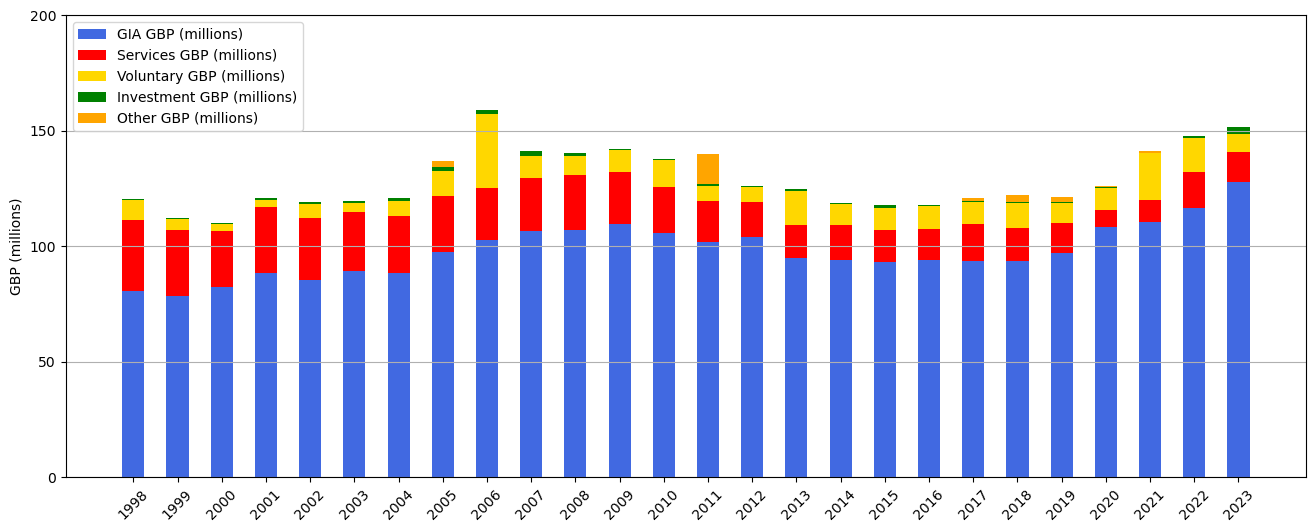

In [95]:
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(data.year, y1, width=0.5, color='royalblue', label='GIA GBP (millions)')
ax.bar(data.year, y2, bottom=y1, width=0.5, color='red', label='Services GBP (millions)')
ax.bar(data.year, y3, bottom=y1+y2, width=0.5, color='gold', label='Voluntary GBP (millions)')
ax.bar(data.year, y4, bottom=y1+y2+y3, width=0.5, color='green', label='Investment GBP (millions)')
ax.bar(data.year, y5, bottom=y1+y2+y3+y4, width=0.5, color='orange', label='Other GBP (millions)')

ax.set_xticks(ticks=data.year)
ax.set_yticks(ticks=[0.0, 50.0, 100.0, 150.0, 200.0])
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('GBP (millions)')
ax.grid(axis='y')
ax.legend()
plt.show()

In [96]:
# Mask the needed variables
plot2 = data[['gia_y2000_gbp_millions', 'services_y2000_gbp_millions',
      'voluntary_y2000_gbp_millions','investment_y2000_gbp_millions',
      'other_y2000_gbp_millions']]

# For easy access
yy1 = plot2['gia_y2000_gbp_millions']
yy2 = plot2['services_y2000_gbp_millions']
yy3 = plot2['voluntary_y2000_gbp_millions']
yy4 = plot2['investment_y2000_gbp_millions']
yy5 = plot2['other_y2000_gbp_millions']

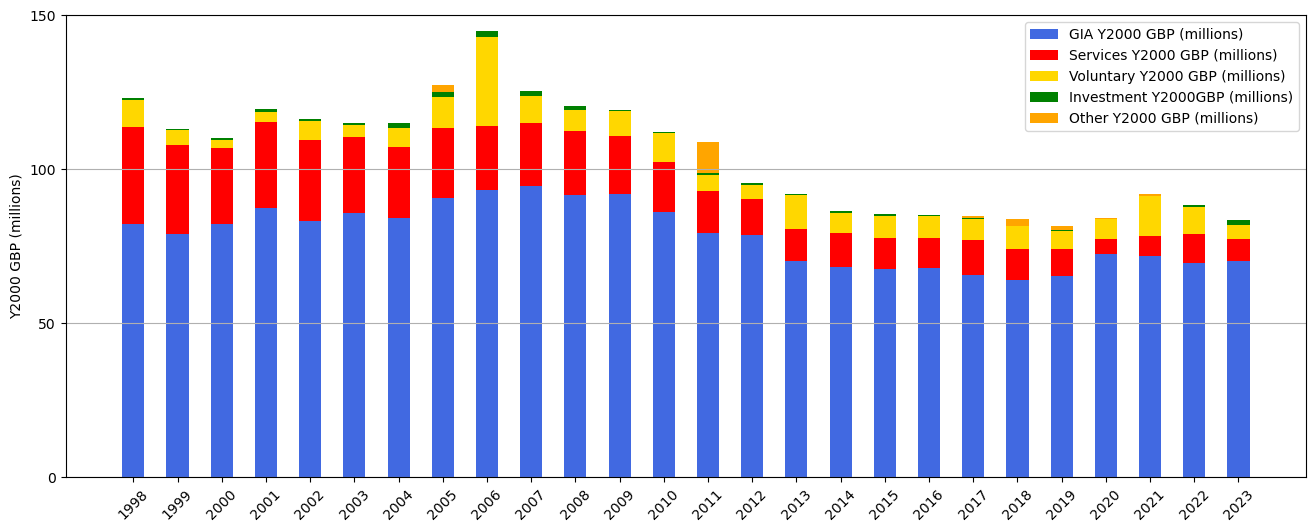

In [97]:
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(data.year, yy1, width=0.5, color='royalblue', label='GIA Y2000 GBP (millions)')
ax.bar(data.year, yy2, bottom=yy1, width=0.5, color='red', label='Services Y2000 GBP (millions)')
ax.bar(data.year, yy3, bottom=yy1+yy2, width=0.5, color='gold', label='Voluntary Y2000 GBP (millions)')
ax.bar(data.year, yy4, bottom=yy1+yy2+yy3, width=0.5, color='green', label='Investment Y2000GBP (millions)')
ax.bar(data.year, yy5, bottom=yy1+yy2+yy3+yy4, width=0.5, color='orange', label='Other Y2000 GBP (millions)')

ax.set_xticks(ticks=data.year)
ax.set_yticks(ticks=[0.0, 50.0, 100.0, 150.0])
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('Y2000 GBP (millions)')
ax.grid(axis='y')
ax.legend()
plt.show()

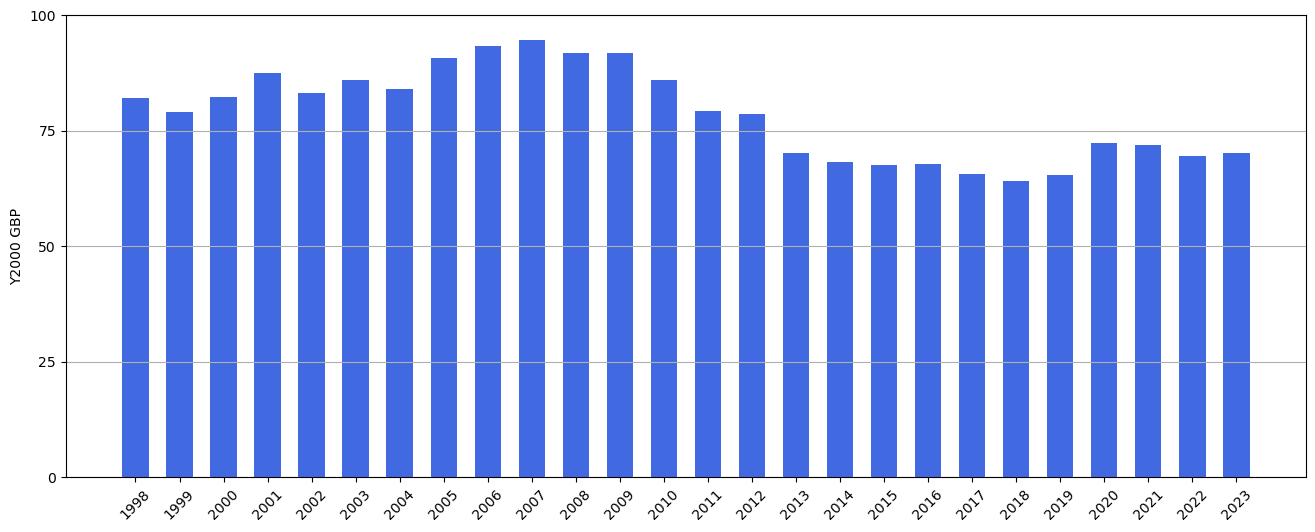

In [98]:
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(data.year, data['gia_y2000_gbp_millions'], width=0.6, color='royalblue')
ax.set_xticks(data.year)
ax.tick_params(axis='x', labelrotation=45)
ax.set_yticks(ticks=[0, 25, 50, 75, 100])
ax.set_ylabel('Y2000 GBP')
ax.grid(axis='y')
plt.show()

### Right Top 2 ###

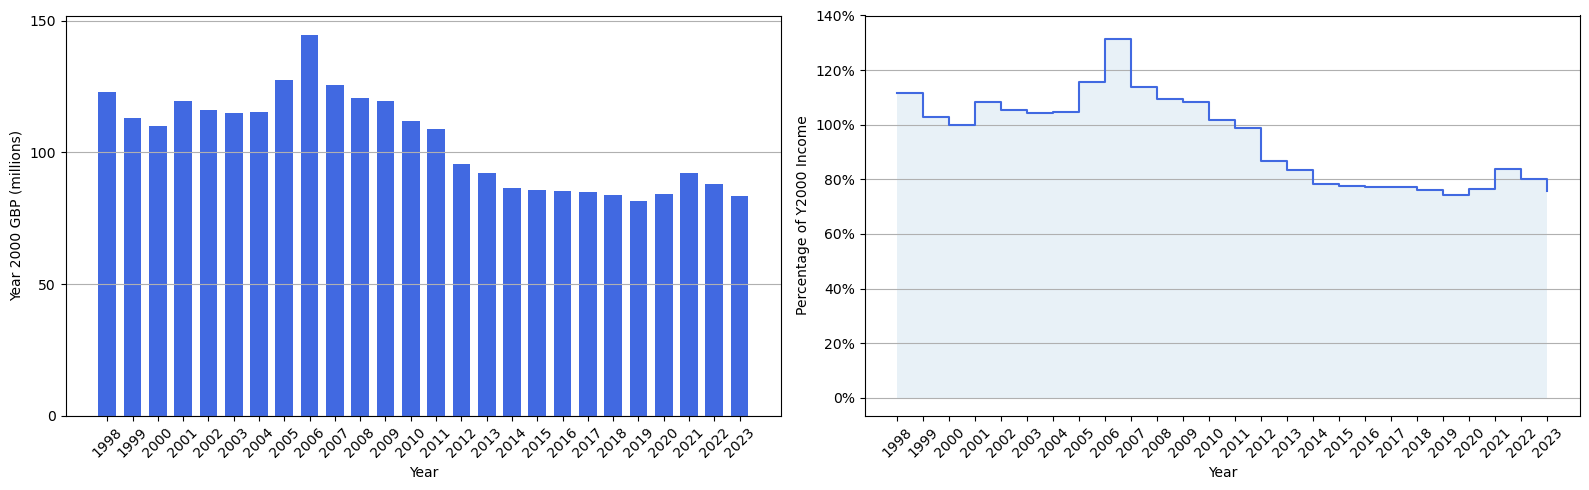

In [119]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

ax[0].bar(data.year, data['total_y2000_gbp_millions'], width=0.7, color='royalblue')
ax[0].set_xticks(data.year)
ax[0].set_xlabel('Year')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_yticks(ticks=[0, 50, 100, 150])
ax[0].set_ylabel('Year 2000 GBP (millions)')
ax[0].grid(axis='y')

ax[1].plot(data.year, data['percentage_of_y2000_income']*100, drawstyle="steps", color='royalblue')
ax[1].fill_between(data.year, data['percentage_of_y2000_income']*100, step="pre", alpha=0.1)
ax[1].set_xticks(data.year)
ax[1].set_xlabel('Year')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_yticks(ticks=np.arange(0,160,20))
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].set_ylabel('Percentage of Y2000 Income')
ax[1].grid(axis='y')

fig.tight_layout()
plt.show()

### Bottom Right 4 ###

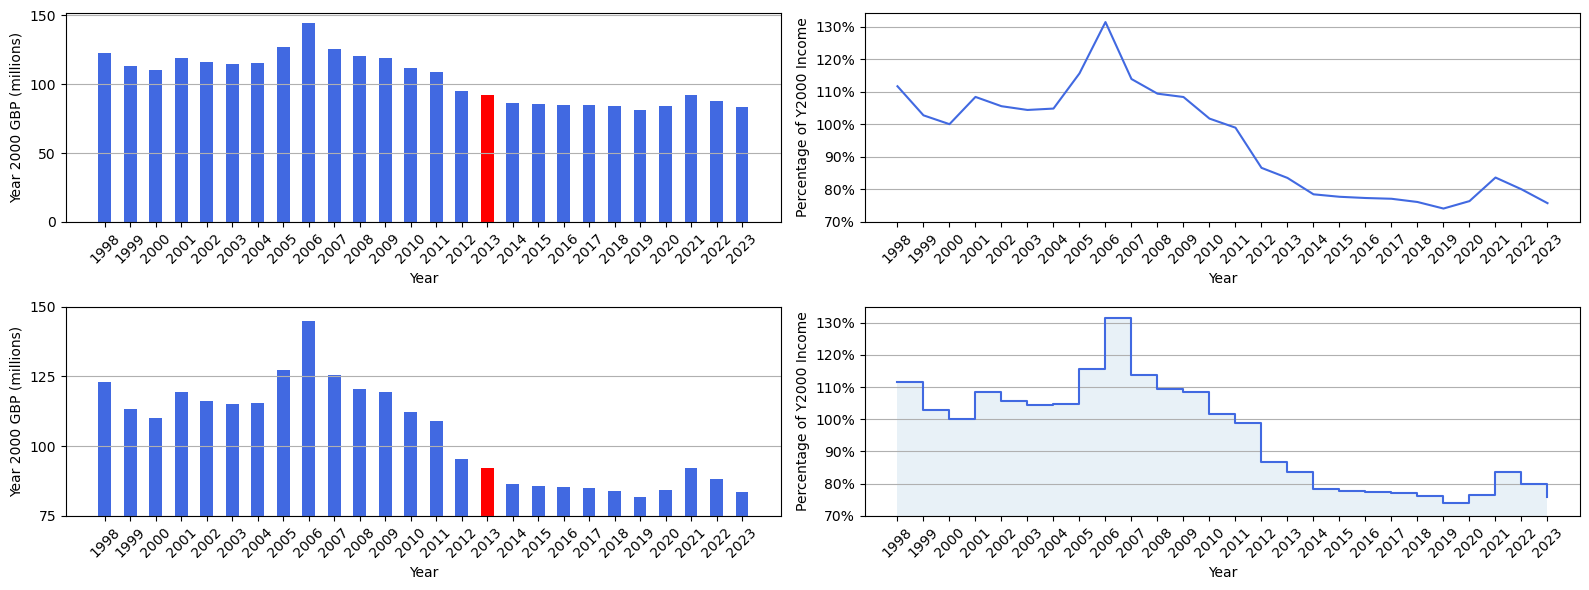

In [99]:
fig, ax = plt.subplots(2,2, figsize=(16,6))

ax[0,0].bar(data.year, data['total_y2000_gbp_millions'], width=0.5, color='royalblue')
ax[0,0].bar(2013, data['total_y2000_gbp_millions'][10], width=0.5, color='red')
ax[0,0].set_xticks(data.year)
ax[0,0].set_xlabel('Year')
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,0].set_yticks(ticks=[0, 50, 100, 150])
ax[0,0].set_ylabel('Year 2000 GBP (millions)')
ax[0,0].grid(axis='y')

ax[0,1].plot(data.year, data['percentage_of_y2000_income']*100, color='royalblue')
ax[0,1].set_xticks(data.year)
ax[0,1].set_xlabel('Year')
ax[0,1].tick_params(axis='x', labelrotation=45)
ax[0,1].set_yticks(ticks=[70, 80, 90, 100, 110 ,120, 130])
ax[0,1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0,1].set_ylabel('Percentage of Y2000 Income')
ax[0,1].grid(axis='y')

ax[1,0].bar(data.year, data['total_y2000_gbp_millions'], width=0.5, color='royalblue')
ax[1,0].bar(2013, data['total_y2000_gbp_millions'][10], width=0.5, color='red')
ax[1,0].set_xticks(data.year)
ax[1,0].set_xlabel('Year')
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].set_yticks(ticks=[75, 100, 125, 150])
ax[1,0].set_ylim(bottom=75, top=150)
ax[1,0].set_ylabel('Year 2000 GBP (millions)')
ax[1,0].grid(axis='y')

ax[1,1].plot(data.year, data['percentage_of_y2000_income']*100, drawstyle="steps", color='royalblue')
ax[1,1].fill_between(data.year, data['percentage_of_y2000_income']*100, step="pre", alpha=0.1)
ax[1,1].set_xticks(data.year)
ax[1,1].set_xlabel('Year')
ax[1,1].tick_params(axis='x', labelrotation=45)
ax[1,1].set_yticks(ticks=[70, 80, 90, 100, 110 ,120, 130])
ax[1,1].set_ylim(bottom=70, top=135)
ax[1,1].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[1,1].set_ylabel('Percentage of Y2000 Income')
ax[1,1].grid(axis='y')

fig.tight_layout()
plt.show()

Finished.


Things I learned:
* `plt.grid()` has the arguement `axis='y'` to only inlcude horizontal lines.
* I probably learned this a while ago but just forgot, but `plt.plot` has a `drawstyle` argument. I used  `steps` to make a few line plots have a rigid step shape.
* How to stack bar plots with different colors, as seen from the "Plots from the Google Sheets link"